# Submesoscale flows and fluxes

#### Load packages

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
plt.rcParams['figure.figsize']=(10,8)

#### Load data


In [9]:
data_dir='/home/wizard/Documents/observing_the_ocean/swart/exercises/Exercise2/'
dat=scio.loadmat(data_dir+'Swart_Exercise2_dens_gridded.mat')

In [10]:
dat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'depth', 'distance', 'density'])

In [11]:
dens=dat['density']
dep=dat['depth'].flatten()
dist=dat['distance'].flatten()

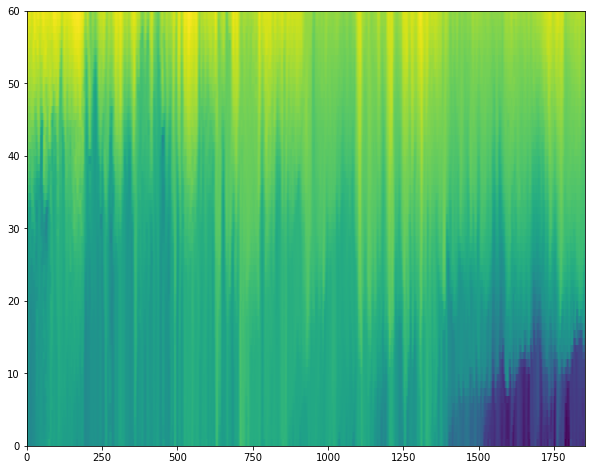

In [12]:
#### Quick look at data
plt.pcolormesh(dens)

#### MLD definition

In [13]:
#this is a python definition. this could also be written in lambda form
def mld_calc(density,depth):
    return depth[(abs((density-density[2]))>=0.03)].min()

In [14]:
###testing iterator functionality in place of looping. calls definition above
mld = np.array([mld_calc(x,dep) for x in dens.T])  

Text(0.5,0,'Distance (km)')

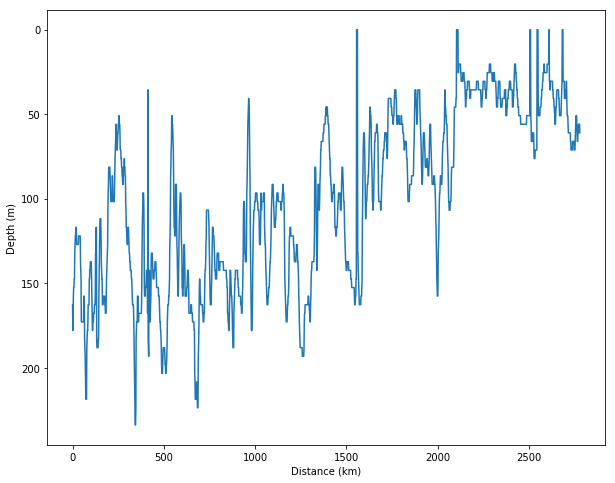

In [16]:
plt.plot(dist,mld)
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Distance (km)')


#### Buoyancy gradient at midpoint of mld

In [17]:
### Compute index at middle of mixed layer
### Try using mapping functionality instead of looping
find_midpoint=lambda x: np.abs((dep-x/2)).argmin()   #this should be generic
mld_mp = list(map(find_midpoint,mld))
mld_mp=np.asarray(mld_mp)

### find density at middle of mixed layer  

i=range(len(mld_mp))
find_dens=lambda x,i:dens[dep<=x,i].min() 
dens_=list(map(find_dens,mld_mp,i))
dens_=np.asarray(dens_)

In [18]:
find_midpoint=lambda mld: np.abs((dep-mld/2)).argmin()
mld_mp = list(map(find_midpoint,mld))


Text(0.5,0,'Distance (km)')

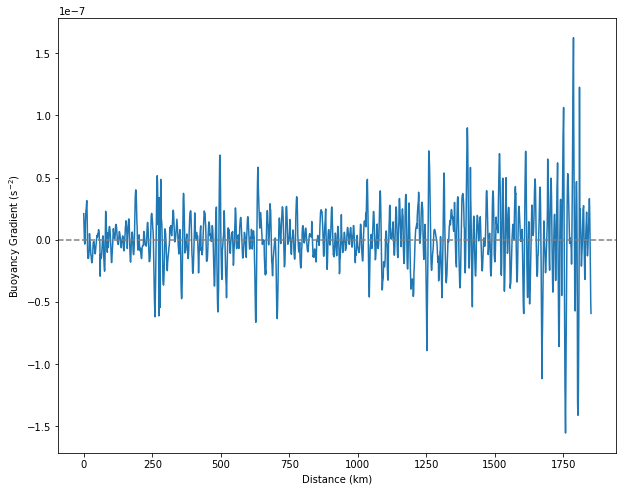

In [22]:
g=9.8
dens_ref=1027
gradb=(-g/dens_ref)*(((dens_[1:]-dens_[:-1])/(1800)))
gradb
plt.plot(gradb)
plt.axhline(0,c='Grey',linestyle='--')
plt.ylabel('Buoyancy Gradient (s$^{-2}$)')
plt.xlabel('Distance (km)')

#### Compute equivalent heat flux

In [24]:
cp=4000
rho=1027
alpha=10**-4
g=9.8

def coriolis_acc(lat,omega=0.729*10**-4):
    return 2*omega*np.sin(lat/360.*2*np.pi)
f=coriolis_acc(43)

Qmle=0.06*((gradb**2*mld[1:]**2)/f)*((cp*rho)/(alpha*g))

In [25]:
Qmle.shape

(1852,)

Text(0.5,0,'Distance (km)')

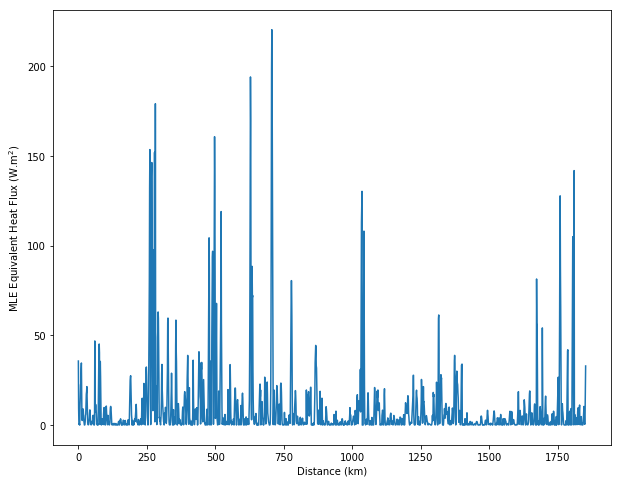

In [27]:
plt.plot(Qmle)
plt.ylabel('MLE Equivalent Heat Flux (W.m$^{2}$)')
plt.xlabel('Distance (km)')

Note: This is always positive as MLE will always act to push lighter water over heavier water, stratifying the ocean

#### Compute ekman buoyancy flux

In [39]:
tau=0.1
cp=4000
alpha=10**-4
g=9.8
f=10**-4


In [40]:
ebf=-(((np.abs(gradb)*tau)/f)*(cp/(alpha*g)))

Text(0.5,0,'Distance (km)')

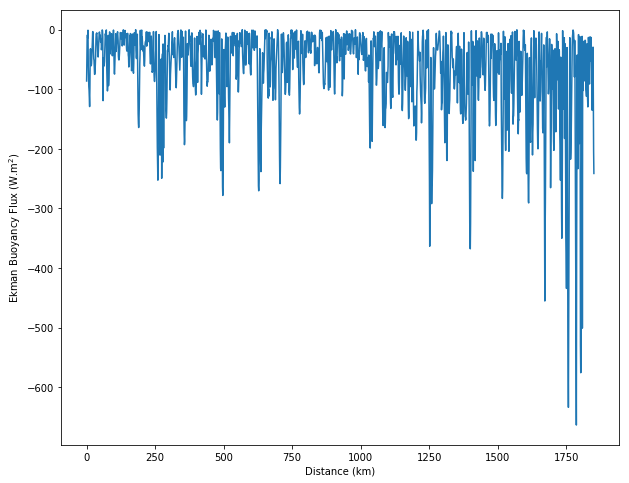

In [41]:
plt.plot(ebf)
plt.ylabel('Ekman Buoyancy Flux (W.m$^{2}$)')
plt.xlabel('Distance (km)')

Note: This is always negative becuase the wind is blowing along-front. 
Therefore dense water is being pushed over lighter water, acting against the 
stratifying tendency of Mixed Layer Eddies to hold up the front


In [51]:
total=Qmle+ebf

array([ -50.45609511,  -36.97704182,  -12.38181913, ..., -109.89183007,
       -183.60723347, -208.37503542])

In [52]:
print('mean equivalent heat flux = {:0.2f}'.format(total.mean()))

mean equivalent heat flux = -60.06


Stratification of the front is being prevented up by the Ekman Buoyancy Flux which is
opposing the equivalent heat flux from the Mixed Layer Eddies. Dense water is being pushed over lighter water due to ekman transport. 